## Testing the BPASS isochrone at 10^8.2 years age. (Unresolved Multiplicity (Lu et al. 2013))
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 1 billion years age, solar metallicity, AKs=0.5, and distance of 2000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs pseudo-M_V), and the mass luminosity relationshi of the cluster. **Note that I say pseudo-M_V as it is the absoulte magnitude but NOT accounting for extinction**

Formula for pseudo M_V
pseudo-M_V = V - 5$log_{10}$(distance to cluster/(10 pc))

Other notes:

I have chosen dist to cluster = 2000 pc to further distinguish this notebook from the other 10^8.2 year old isochrone Notebook.
**As the title indicates, I have decided to use unresolved multiplicity in my BPASS and MISTv.1 clusters.**

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(8.2, 0.5, 2000,math.log10(1), mass_sampling=1, filepath='/g/lu/scratch/ryotainagaki/BPASS_iso_filesTimedIsolated/')

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1771: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to logg=5.00 for T= 38774 logg=8.52
Changing to logg=5.00 for T= 36146 logg=8.54
Changing to logg=5.00 for T= 44758 logg=8.49
Changing to T= 50000 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 38361 logg=8.50
Changing to T= 50000 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 39097 logg=5.40
Changing to logg=5.00 for T= 42300 logg=8.53
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 42300 logg=8.53
Changing to logg=5.00 for T= 38751 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 39036 logg=5.38
Changing to logg=5.00 for T= 35710 logg=8.52
Changing to logg=5.00 for T= 39110 logg=5.45
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42300 logg=8.53
Changing to logg=5.00 for T= 37638 logg=5.66
Changing to 

Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38216 logg=5.28
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 39074 logg=5.38
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38030 logg=5.34
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 35649 logg=8.52
Changing to logg=5.00 for T= 45954 logg=8.68
Changing to logg=5.00 for T= 45669 logg=8.52
Changing to logg=5.00 for T= 38942 logg=5.43
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 35776 logg=8.52
Changing to logg=5.00 for T= 45669 logg=8.52
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 34980 logg=5.56
Changing to logg=5.00 for T= 37138 logg=5.69
Changing to logg=5.00 for T= 35708 logg=8.52
Changing to logg=5.00 for T= 43455 logg=8.58
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38543 logg=5.67
Changing t

Primaries
M =   4.000 Msun  T = 11805 K  m_ubv_U = 17.90
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   2.500 Msun  T = 10121 K  m_ubv_U = 20.40
M =   1.000 Msun  T =   nan K  m_ubv_U =  nan
M =   4.500 Msun  T =  4524 K  m_ubv_U = 19.73
M =   3.500 Msun  T = 12112 K  m_ubv_U = 18.81
M =   3.200 Msun  T = 11518 K  m_ubv_U = 17.34
M =   4.500 Msun  T =  4524 K  m_ubv_U = 19.73
M =   0.631 Msun  T =   nan K  m_ubv_U =  nan
M =   6.500 Msun  T = 33471 K  m_ubv_U = 29.75
M =   4.000 Msun  T = 11805 K  m_ubv_U = 17.90
M =   4.500 Msun  T =  6502 K  m_ubv_U = 20.43
M =   3.000 Msun  T = 11265 K  m_ubv_U = 19.57
M =   5.000 Msun  T = 29779 K  m_ubv_U = 28.91
M =   6.500 Msun  T = 33463 K  m_ubv_U = 29.75
M =   5.500 Msun  T = 27320 K  m_ubv_U = 29.30
M =   0.501 Msun  T =   nan K  m_ubv_U =  nan
M =   2.100 Msun  T = 11910 K  m_ubv_U = 18.55
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   1.400 Msun  T =   nan K  m_ubv_U =  nan
M =   2.500 Msun  T = 10121 K  m_ubv_U = 20.40
M =   1.4

Starting filter: ubv,R   Elapsed time: 29.04 seconds
Starting synthetic photometry
Singles
M =   1.400 Msun  T =  6633 K  m_ubv_R = 20.27
Primaries
M =   4.000 Msun  T = 11805 K  m_ubv_R = 16.06
M =   1.400 Msun  T =   nan K  m_ubv_R =  nan
M =   2.500 Msun  T = 10121 K  m_ubv_R = 18.23
M =   1.000 Msun  T =   nan K  m_ubv_R =  nan
M =   4.500 Msun  T =  4524 K  m_ubv_R = 14.24
M =   3.500 Msun  T = 12112 K  m_ubv_R = 16.99
M =   3.200 Msun  T = 11518 K  m_ubv_R = 15.48
M =   4.500 Msun  T =  4524 K  m_ubv_R = 14.24
M =   0.631 Msun  T =   nan K  m_ubv_R =  nan
M =   6.500 Msun  T = 33471 K  m_ubv_R = 28.94
M =   4.000 Msun  T = 11805 K  m_ubv_R = 16.06
M =   4.500 Msun  T =  6502 K  m_ubv_R = 17.28
M =   3.000 Msun  T = 11265 K  m_ubv_R = 17.62
M =   5.000 Msun  T = 29779 K  m_ubv_R = 28.01
M =   6.500 Msun  T = 33463 K  m_ubv_R = 28.94
M =   5.500 Msun  T = 27320 K  m_ubv_R = 28.32
M =   0.501 Msun  T =   nan K  m_ubv_R =  nan
M =   2.100 Msun  T = 11910 K  m_ubv_R = 16.72
M =   1.40

For a sanity check, we can see that the primaries, secondaries, and single stars have phasees of 5 or of 101 or of 110. Note that we will have a phase of 110 in order to indicate a mystery compact remnant that BPASS provides for NEWSECMODS (secondary star models with compact primaries). This is since we haven't added neutron stars or black holes yet. Stars with phase of -99 exist, and those are the secondary stars that have already merged. Secondary stars that have merged with their primaries have designation of phase -99.

In [2]:
import numpy as np
np.all([(x==5 or x==101 or x==110) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x==5 or x==101 or x==110) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x==5 or x==101 or x==-99 or x==110) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries and secondaries accounting for NaNs in the columns. (For max we make NaNs the same as - infinity and for median and mean, we do not include them)

In [5]:
np.max(iso1.singles['logg'])

9.294869501162154

In [6]:
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

9.288600394549206

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg'], -np.inf))

9.283702439639246

Now let's find the mean and median logg values for the single stars, secondary stars, and the primary stars

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

5.354531279865074

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

5.166598048581407

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

4.7087761944824305

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.2498758947769355

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.101838137301644

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.298445675989428

Let's make a histogram of log_g values for each table of the isochrone

Text(0.5, 0, 'logg in cgs')

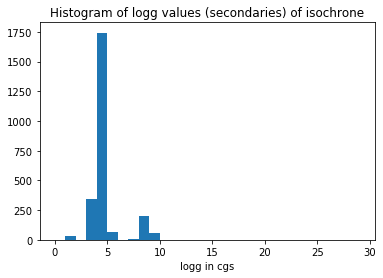

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

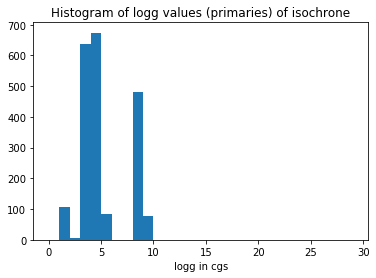

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

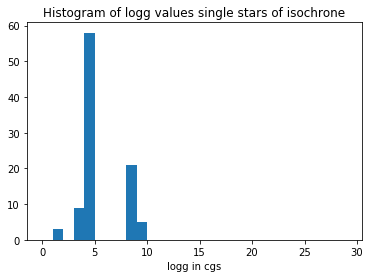

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

For comparison, let's create a MIST v.1. isochrone  phot using otherwise same parameters.

In [17]:
iso2=synthetic.IsochronePhot(8.2, 0.5, 2000, math.log(1), recomp=True) # New MIST v.1 isochrone for same metallicity

Isochrone generation took 25.706956 s.
Making photometry for isochrone: log(t) = 8.20  AKs = 0.50  dist = 2000
     Starting at:  2021-01-04 10:13:16.895940   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.111 Msun  T =  2982 K  m_ubv_U = 36.50
M =   1.468 Msun  T =  7177 K  m_ubv_U = 22.86
M =   4.392 Msun  T =  4603 K  m_ubv_U = 19.88
M =   4.423 Msun  T =  3455 K  m_ubv_U = 20.25
M =   4.425 Msun  T = 23358 K  m_ubv_U = 14.37
M =   4.425 Msun  T = 170211 K  m_ubv_U = 19.99
M =   4.426 Msun  T = 157705 K  m_ubv_U = 25.22
Starting filter: ubv,B   Elapsed time: 1.99 seconds
Starting synthetic photometry
M =   0.111 Msun  T =  2982 K  m_ubv_B = 35.72
M =   1.468 Msun  T =  7177 K  m_ubv_B = 22.90
M =   4.392 Msun  T =  4603 K  m_ubv_B = 18.83
M =   4.423 Msun  T =  3455 K  m_ubv_B = 18.85
M =   4.425 Msun  T = 23358 K  m_ubv_B = 15.41
M =   4.425 Msun  T = 170211 K  m_ubv_B = 21.19
M =   4.426 Msun  T = 157705 K  m_ubv_

Note: dist/10 pc = 200 for both of our isochrones and clusters

Find the maximum logg of the isochrone and the distribution of logg values

In [18]:
np.max(iso2.points['logg'])

8.038804565028379

(array([ 96., 103.,  29.,  55., 179.,  39.,  26.,  71.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

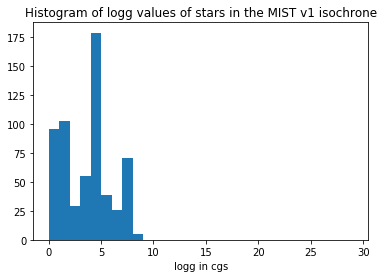

In [19]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the MIST v1 isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))

Finding the log_g median and mean for the new isochrone

In [20]:
np.median(iso2.points['logg'])

4.190403645585174

In [21]:
np.mean(iso2.points['logg'])

3.7100077975325854

Now we want to make clusters for both of these models and plot CMD, HR Diagram, and Mass Luminosity relationship for the isochrones. Then, we want to find the Mass luminosity relationship and CMD for the cluster.

In [22]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


In [23]:
clus_1=synthetic.Binary_Cluster(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityUnresolved()), 2000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityUnresolved()), 2000, ifmr=ifmr.IFMR_Spera15())

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Found 12 companions out of stellar mass range


Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
Remember to use a distance modulus!

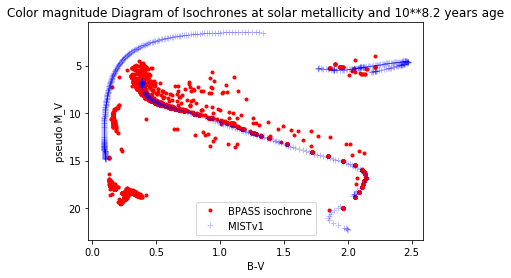

In [24]:

import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(200), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"], iso1.secondaries["m_ubv_V"]-5*np.log10(200), "r.")
plt.plot(iso1.singles['m_ubv_B']-iso1.singles["m_ubv_V"], iso1.singles["m_ubv_V"]-5*np.log10(200), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B']-iso2.points["m_ubv_V"], iso2.points["m_ubv_V"]-5*np.log10(200), "b+", label="MISTv1", alpha=0.25)
plt.xlabel("B-V")
plt.ylabel("pseudo M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

No handles with labels found to put in legend.


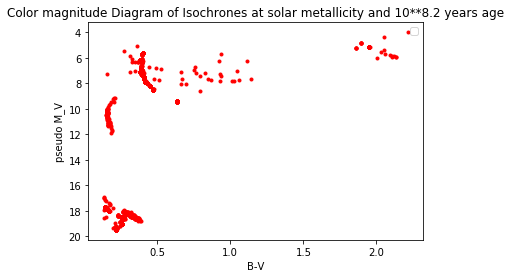

In [25]:
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B']-iso1.primaries["m_ubv_V"], iso1.primaries["m_ubv_V"]-5*np.log10(200), "r.")
plt.xlabel("B-V")
plt.ylabel("pseudo M_V")
plt.title("Color magnitude Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

**Finding where there are extremely low V magnitudes.** This includes looking at the insides of a primary star table

In [26]:
np.unique(iso1.primaries[np.where(iso1.primaries['m_ubv_V']-np.log10(2000/10)>25.0)]['phase'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


5.0
101.0


In [27]:
iso1.primaries[np.where((iso1.primaries['m_ubv_V']-10< 25.0) & (iso1.primaries['phase']== 5))]

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
4.0,1.6512085513837888e+29,11804.837142385752,3454380426.983821,3.6465954007915196,False,3.99823,5.0,1,17.89642176718931,17.817363154256427,18.21085641153647,16.063322980911884,13.498484569756611
4.5,7.236722660866479e+28,39096.690832098415,208487568.4241099,5.398469934003078,True,0.82255,5.0,1,20.77883179466383,21.703606123206253,21.862104579194536,20.058228162134633,17.725295482647322
3.2,2.6736954014653107e+29,11518.077596077594,4617268863.215177,3.435183029503001,False,4.39011,5.0,1,17.33760937657738,17.236914408551122,17.633247065596603,15.478827577016686,12.904319860474322
3.5,7.471743064187931e+28,12112.394295485958,2207192258.4573445,3.9777810712007264,False,3.49956,5.0,1,18.806343248248368,18.740224298315084,19.133513926343877,16.9909897353106,14.436635191770959
4.5,3.8848291972676705e+29,4524.493826799286,36069088234.0388,1.657984548899564,False,4.47504,5.0,1,19.729621336207536,16.6392756231814,18.584950527366352,14.24229880840067,11.011947527643558
3.2,1.1132736479542177e+29,12176.711036800833,2665815963.117689,3.84427495422534,False,3.75394,5.0,1,18.365603451899325,18.318833830075903,18.708151898577484,16.569205543574338,14.015605983653526
2.7,9.110284281408612e+28,12725.650748860555,2207980147.486766,4.002638975008916,False,3.70827,5.0,1,18.63634913426377,18.64274701395864,19.023709732898915,16.898499385925234,14.359134130643733
3.7,8.38800014121492e+25,42300.06161730419,6063681.956340052,8.531181527090537,False,0.94133,5.0,1,28.341138433535104,29.286216081472176,29.434197685877955,27.639694017235122,25.309252259343594


In [28]:
np.min(([x-10 for x in iso1.secondaries["m_ubv_V"] if np.isfinite(x)]))

6.044909972873647

Plotting the HR Diagram of the Isochrones

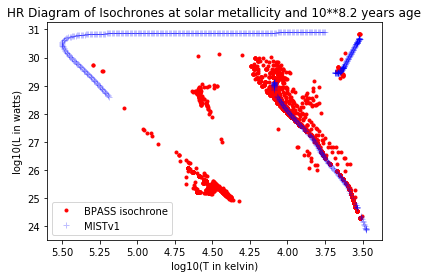

In [29]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.")
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.")
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+", label="MISTv1", alpha=0.25)
plt.xlabel("log10(T in kelvin)")
plt.ylabel("log10(L in watts)")
plt.title("HR Diagram of Isochrones at solar metallicity and 10**8.2 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

Plot the mass-luminosity relationship of the clusters (primary stars)

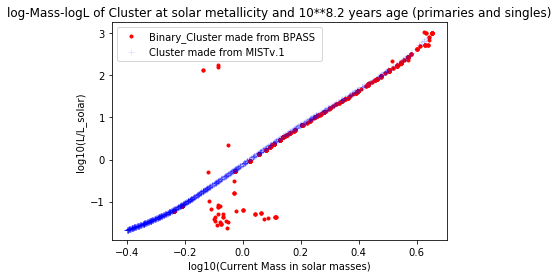

In [30]:
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]/cs.L_sun), "r.", label="Binary_Cluster made from BPASS ", alpha =1)
plt.plot(np.log10(clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]/(cs.L_sun*1/u.W)), "b+", label="Cluster made from MISTv.1", alpha=0.1)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log-Mass-logL of Cluster at solar metallicity and 10**8.2 years age (primaries and singles)")
plt.legend()
# Rough pattern seems to fit. What's that line?

Plot the mass-luminosity relationship of the isochrone

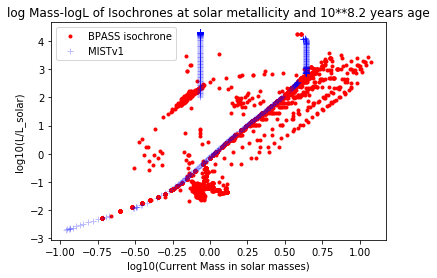

In [31]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"]/cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"]/cs.L_sun), "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"]/cs.L_sun), "b+", label="MISTv1", alpha=0.25)
plt.xlabel("log10(Current Mass in solar masses)")
plt.ylabel("log10(L/L_solar)")
plt.title("log Mass-logL of Isochrones at solar metallicity and 10**8.2 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Examining the phases of primary stars that have luminosities of less than L_sun * 1/sqrt(2)

In [32]:
np.unique(clus_1.star_systems[np.where(np.log10(clus_1.star_systems['L']/cs.L_sun)<-0.5)]['phase'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


5.0
101.0


Sanity check no phase 0 stars.

In [33]:
clus_1.star_systems[np.where(clus_1.star_systems['phase']==0)]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,K,W,,,solMass,,,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64


Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
Remember to use a distance modulus!

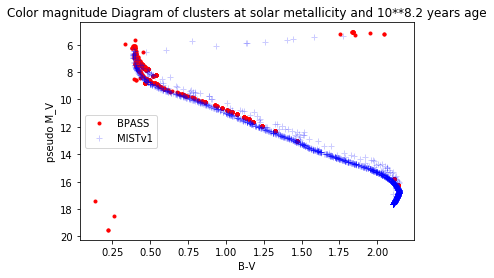

In [34]:
# Taking a look at the Binary Cluster vs Default Settings cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B']-clus_1.star_systems["m_ubv_V"], clus_1.star_systems["m_ubv_V"]-5*np.log10(200), "r.",label="BPASS")
plt.plot(clus_2.star_systems['m_ubv_B']-clus_2.star_systems["m_ubv_V"], clus_2.star_systems["m_ubv_V"]-5*np.log10(200), "b+", label="MISTv1", alpha=0.2)
plt.xlabel("B-V")
plt.ylabel("pseudo M_V")
plt.title("Color magnitude Diagram of clusters at solar metallicity and 10**8.2 years age")
plt.gca().invert_yaxis()
plt.legend()

One thing to note about the Binary_Cluster is that it does include the units as information for columns.
The usual ResolvedCluster does not. Thus the latter has a disadvantage when we do comparisons with solar luminosity.

In any case let's compare the actual masses of the cluster

In [35]:
np.sum(clus_1.star_systems['systemMass'])

1808.6680703099232

In [36]:
np.sum(clus_2.star_systems['systemMass'])

1999.500064015294